In [1]:
% matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../TP5/data/train.csv')

X = df.ix[:,1:-1].values
y = df['target']

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

#### Probamos un Árbol (ETC) sin personalizar parámetros

In [3]:
clf = ExtraTreesClassifier(n_estimators=100, max_features=0.2, n_jobs=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [4]:
scores = classification_report(y_test, y_pred)
print scores

             precision    recall  f1-score   support

          0       0.75      0.42      0.54       469
          1       0.71      0.88      0.79      3988
          2       0.64      0.49      0.56      2034
          3       0.83      0.46      0.60       655
          4       0.98      0.97      0.97       701
          5       0.93      0.96      0.94      3556
          6       0.80      0.58      0.67       734
          7       0.88      0.93      0.90      2059
          8       0.87      0.87      0.87      1274

avg / total       0.81      0.81      0.80     15470



#### Hacemos un GridSearch para buscar los mejores parámetros para nuestro clasificador

In [5]:
parameters = {'max_features':np.arange(0.02,0.5,0.1), 'n_estimators':[100,400]}
#clf = ExtraTreesClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(X_train, y_train)
#print clf.best_score_
#print clf.best_params_

#### Creamos un clasificador con los parámetros indicados por el GridSearch 
#### {'max_features': 0.42000000000000004, 'n_estimators': 400}

In [6]:
clf = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2, max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Features más relevantes

(93,)


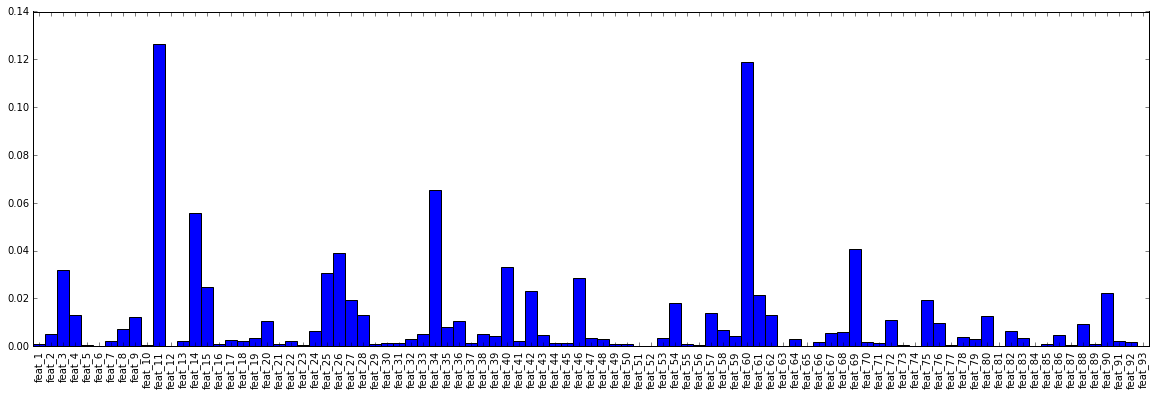

0.126448357318 feat_11
0.119012633757 feat_60
0.0652835227741 feat_34
0.0558063746428 feat_14
0.0406038421566 feat_69
0.0391675132484 feat_26
0.0331573467854 feat_40
0.0317803398423 feat_3
0.0306883082721 feat_25
0.0286711512967 feat_46


In [7]:
importances = clf.feature_importances_

text = map(lambda i: df.columns[1:-1][i], range(93))
plt.figure(figsize=(20, 6))
print importances[::-1].shape
plt.bar(range(93),height=importances,  width=1.)
plt.xticks(np.arange(0.5, 93, 1.), text, rotation=90)
plt.xlim((0, 93))
plt.show()
# Top 10
indices = np.argsort(importances)[::-1]
for i in range(10):
    print importances[indices[i]], df.columns[1:-1][indices[i]]

### Scores obtenidos

#### Confussion Matrix y Classification Report

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.46      0.63      8707
          2       0.00      0.80      0.00         5
          3       0.01      1.00      0.02         5
          4       0.84      0.99      0.91       598
          5       0.92      0.90      0.91      3665
          6       0.04      0.96      0.07        28
          7       0.76      0.81      0.78      1923
          8       0.38      0.91      0.54       539

avg / total       0.92      0.64      0.72     15470

0.641822882999


/home/bruno/.virtualenvs/dss/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


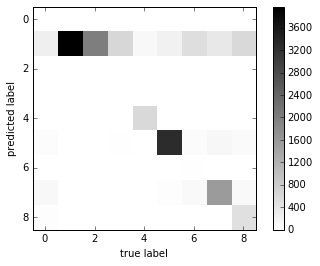

In [8]:
def plot_matrix(clf, X_test, y_test):
    plt.clf()
    plt.imshow(confusion_matrix(clf.predict(X_test), y_test),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()

print classification_report(y_pred, y_test)
print clf.score(X_test, y_test)
plot_matrix(clf, X_test, y_test)

0.257789269554


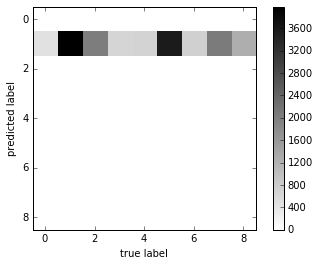

In [9]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)
print clf.score(X_test, y_test)
plot_matrix(clf, X_test, y_test)